In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

In [3]:
df.head() 

,Timestamp,Age of Participant,Gender,Nationality,Academic Status,Field of Education,Email,Contact Number (Optional),Do you know about how antibiotics differ from other drugs?,Pick the most appropriate definition of antibiotics,...,What type of movement on public health issues do you think will be effective in setting malpractices right?,Why do you think public health issues don’t get due importance in public opinion?,How many antibiotics have you taken over the past 3 years?,What was the pattern of antibiotic use?,What was the formulation of the product used?,What was the best experience with the consumption of antibiotics?,What was the worst experience with the consumption of antibiotics?,How did you come to consume the antibiotic?,Have you experienced treatment failure from antibiotic consumption?,What was your understanding of treatment failure?
0,7/6/2020 1:23:29,22,Male,Bangladeshi,BS.c,Microbiology,linconjnu@gmail.com,1742100015,Yes,Medicine used to treat infections,...,Citizen movement from all people,Our people are not educated enough to understa...,I don’t remember,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/6/2020 1:27:29,21,Male,Bangladeshi,Honours 2nd year,Microbiology,mdarafat01853467085@gmail.com,NaN,Yes,Medicine used to treat infections,...,Movement in media to form public opinion,Our people are not educated enough to understa...,I don’t remember,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/6/2020 2:49:03,21,Female,Bangladeshi,BSc,Microbiology,sadianasertanjin@gmail.com,NaN,Yes,Medicine used to treat infections,...,"Professional movement by doctors, pharmaceutic...",Our people are not educated enough to understa...,I know precisely,I took multiple antibiotics multiple times,Tablet,"I recovered from the symptoms quickly, which w...",Side-effects,A registered physician prescribed it for the s...,No,I suspect the quality of the antibiotic was no...
3,7/6/2020 1:48:30,21,Male,Bangladeshi,B.sc,Microbiology,prantoiftakherahmed@gmail.com,1957353494,No,Medicine used to treat viral disease,...,Legal movement by welfare lawyers,Our government does not endorse forming public...,I don’t remember,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/6/2020 2:12:32,20,Female,Bangladeshi,BSc,Microbiology,miftah.aourthy@gmail.com,1645762412,No,Medicine used to treat infections,...,"Professional movement by doctors, pharmaceutic...",Our people are not educated enough to understa...,I don’t remember,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring Data 

In [4]:
df.columns

Index(['Timestamp', 'Age of Participant', 'Gender', 'Nationality',
       'Academic Status', 'Field of Education', 'Email',
       'Contact Number (Optional)',
       'Do you know about how antibiotics differ from other drugs?',
       'Pick the most appropriate definition of antibiotics',
       'How can you identify an antibiotic?',
       'What is your idea about the importance of antibiotics?',
       'What is the most dangerous impact of antibiotics?',
       'What is your opinion about antibiotic usage?',
       'What is your perception of drug-resistant germs?',
       'Do you have idea about antibiotic resistance as a threat to public health?',
       'Choose a statement that you feel is the best strategy to face antibiotic-resistance',
       'Which of the strategies have you heard about against antibiotic resistance?',
       'What type of movement on public health issues do you think will be effective in setting malpractices right?',
       'Why do you think public health is

In [5]:
df.shape

(270, 28)

## Distribution of Age 

In [6]:
# Median age of participant
print("Median age of participant: ", df['Age of Participant'].median())

Median age of participant:  21.0


In [7]:
# Summary 
df['Age of Participant'].describe() 

count    270.000000
mean      22.100000
std        3.192871
min       14.000000
25%       20.000000
50%       21.000000
75%       23.750000
max       34.000000
Name: Age of Participant, dtype: float64

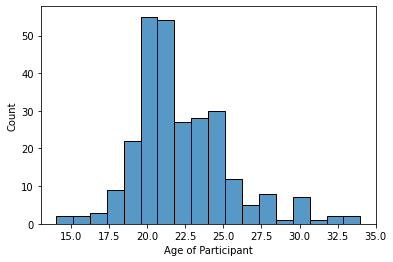

In [102]:
sns.histplot(df['Age of Participant'])

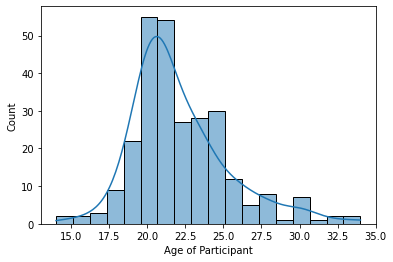

In [101]:
# check normality 
sns.histplot(df['Age of Participant'], kde=True)

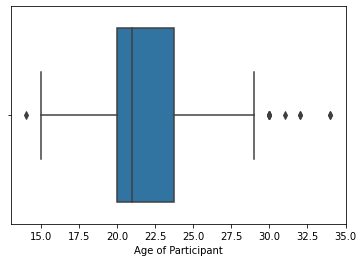

In [10]:
# any outliers?
sns.boxplot(x='Age of Participant', data=df)

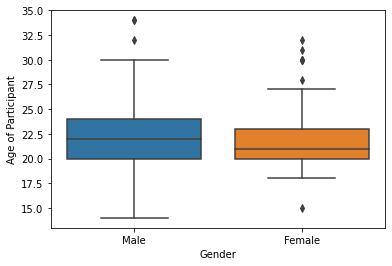

In [11]:
sns.boxplot(x='Gender', y='Age of Participant', data=df)

## Academic Status

In [12]:
df['Academic Status'].value_counts() 

Student             9
BSc                 9
HSC                 9
Bsc                 9
Graduate            6
                   ..
hons                1
Graduation          1
MSc in Science      1
Honours 3rd year    1
H.s.c               1
Name: Academic Status, Length: 201, dtype: int64

## Field of Education

In [13]:
df['Field of Education'].value_counts() 

Microbiology                                     36
Microbiology                                     26
BBA                                               5
Business                                          4
Law                                               4
                                                 ..
Microbiology, Jagannath University                1
Biochemistry and molecular biology                1
Bsc in Industrial & production engineering        1
Social Science and Humanities                     1
Law                                               1
Name: Field of Education, Length: 174, dtype: int64

# Analyzing Questions 

## Question #1: Do you know about how antibiotics differ from other drugs? 

In [14]:
df['Do you know about how antibiotics differ from other drugs?'].value_counts() 

Yes     205
No       64
Name: Do you know about how antibiotics differ from other drugs?, dtype: int64

In [15]:
# proportion 
df['Do you know about how antibiotics differ from other drugs?'].value_counts(normalize=True) 

Yes     0.762082
No      0.237918
Name: Do you know about how antibiotics differ from other drugs?, dtype: float64

In [16]:
# % 
df['Do you know about how antibiotics differ from other drugs?'].value_counts(normalize=True) * 100

Yes     76.208178
No      23.791822
Name: Do you know about how antibiotics differ from other drugs?, dtype: float64

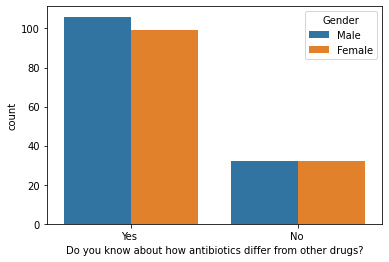

In [17]:
sns.countplot(x='Do you know about how antibiotics differ from other drugs?',data=df, hue='Gender')

## Question #2: Pick the most appropriate definition of antibiotics

In [18]:
df['Pick the most appropriate definition of antibiotics'].value_counts() 

Medicine used to treat infections        140
Medicine used to treat viral disease      93
Medicine used to treat inflammation       26
Medicine used to treat fever              10
No                                         1
Name: Pick the most appropriate definition of antibiotics, dtype: int64

In [19]:
df['Pick the most appropriate definition of antibiotics'].value_counts(normalize=True)

Medicine used to treat infections        0.518519
Medicine used to treat viral disease     0.344444
Medicine used to treat inflammation      0.096296
Medicine used to treat fever             0.037037
No                                       0.003704
Name: Pick the most appropriate definition of antibiotics, dtype: float64

In [20]:
df['Pick the most appropriate definition of antibiotics'].value_counts(normalize=True) * 100 

Medicine used to treat infections        51.851852
Medicine used to treat viral disease     34.444444
Medicine used to treat inflammation       9.629630
Medicine used to treat fever              3.703704
No                                        0.370370
Name: Pick the most appropriate definition of antibiotics, dtype: float64

## Question #3: How can you identify an antibiotic?

In [21]:
df['How can you identify an antibiotic?'].value_counts() 

From the pharmaceutical composition      98
From the datasheet with the medicine     87
I have no idea                           62
From name                                22
Medicine used to treat infections         1
Name: How can you identify an antibiotic?, dtype: int64

In [22]:
df['How can you identify an antibiotic?'].value_counts(normalize=True) 

From the pharmaceutical composition      0.362963
From the datasheet with the medicine     0.322222
I have no idea                           0.229630
From name                                0.081481
Medicine used to treat infections        0.003704
Name: How can you identify an antibiotic?, dtype: float64

In [23]:
df['How can you identify an antibiotic?'].value_counts(normalize=True) * 100

From the pharmaceutical composition      36.296296
From the datasheet with the medicine     32.222222
I have no idea                           22.962963
From name                                 8.148148
Medicine used to treat infections         0.370370
Name: How can you identify an antibiotic?, dtype: float64

## Question #4: What is your idea about the importance of antibiotics?

In [24]:
df['What is your idea about the importance of antibiotics?'].value_counts()

They are the reason infectious diseases have been controlled     140
They are the reason we have reduced diseases                      68
They are the reason epidemics have been controlled                40
They are the reason hospitalization has been reduced              21
From the pharmaceutical composition                                1
Name: What is your idea about the importance of antibiotics?, dtype: int64

In [25]:
df['What is your idea about the importance of antibiotics?'].value_counts(normalize=True)

They are the reason infectious diseases have been controlled     0.518519
They are the reason we have reduced diseases                     0.251852
They are the reason epidemics have been controlled               0.148148
They are the reason hospitalization has been reduced             0.077778
From the pharmaceutical composition                              0.003704
Name: What is your idea about the importance of antibiotics?, dtype: float64

In [26]:
df['What is your idea about the importance of antibiotics?'].value_counts(normalize=True) * 100

They are the reason infectious diseases have been controlled     51.851852
They are the reason we have reduced diseases                     25.185185
They are the reason epidemics have been controlled               14.814815
They are the reason hospitalization has been reduced              7.777778
From the pharmaceutical composition                               0.370370
Name: What is your idea about the importance of antibiotics?, dtype: float64

## Question #5:  What is the most dangerous impact of antibiotics?

In [27]:
df['What is the most dangerous impact of antibiotics?'].value_counts() 

Antibiotic usage spreads antibiotic resistance                   210
Antibiotic consumption damages health                             47
Antibiotic consumption increases the cost of healthcare            8
Antibiotic production pollutes the environment                     4
They are the reason infectious diseases have been controlled       1
Name: What is the most dangerous impact of antibiotics?, dtype: int64

In [46]:
df['What is the most dangerous impact of antibiotics?'].value_counts(normalize=True) 

Antibiotic usage spreads antibiotic resistance                   0.777778
Antibiotic consumption damages health                            0.174074
Antibiotic consumption increases the cost of healthcare          0.029630
Antibiotic production pollutes the environment                   0.014815
They are the reason infectious diseases have been controlled     0.003704
Name: What is the most dangerous impact of antibiotics?, dtype: float64

In [47]:
df['What is the most dangerous impact of antibiotics?'].value_counts(normalize=True) * 100

Antibiotic usage spreads antibiotic resistance                   77.777778
Antibiotic consumption damages health                            17.407407
Antibiotic consumption increases the cost of healthcare           2.962963
Antibiotic production pollutes the environment                    1.481481
They are the reason infectious diseases have been controlled      0.370370
Name: What is the most dangerous impact of antibiotics?, dtype: float64

## Question #6: What is your opinion about antibiotic usage?

In [28]:
df['What is your opinion about antibiotic usage?'].value_counts() 

Antibiotics should be used with proper restrictions because they have side-effects                       224
Antibiotics must be restricted because of the rise of multidrug-resistant germs                           44
Antibiotics consumption must be encouraged because they make profits for the pharmaceutical industry       1
Antibiotic usage spreads antibiotic resistance                                                             1
Name: What is your opinion about antibiotic usage?, dtype: int64

In [48]:
df['What is your opinion about antibiotic usage?'].value_counts(normalize=True) 

Antibiotics should be used with proper restrictions because they have side-effects                       0.829630
Antibiotics must be restricted because of the rise of multidrug-resistant germs                          0.162963
Antibiotics consumption must be encouraged because they make profits for the pharmaceutical industry     0.003704
Antibiotic usage spreads antibiotic resistance                                                           0.003704
Name: What is your opinion about antibiotic usage?, dtype: float64

In [49]:
df['What is your opinion about antibiotic usage?'].value_counts(normalize=True)*100

Antibiotics should be used with proper restrictions because they have side-effects                       82.962963
Antibiotics must be restricted because of the rise of multidrug-resistant germs                          16.296296
Antibiotics consumption must be encouraged because they make profits for the pharmaceutical industry      0.370370
Antibiotic usage spreads antibiotic resistance                                                            0.370370
Name: What is your opinion about antibiotic usage?, dtype: float64

## Question #7: What is your perception of drug-resistant germs?

In [50]:
df['What is your perception of drug-resistant germs?'].value_counts() 

I want to act directly to counter antibiotic-resistance                             94
I am concerned about it                                                             90
I don’t know about it                                                               81
I don’t care about it                                                                4
Antibiotics must be restricted because of the rise of multidrug-resistant germs      1
Name: What is your perception of drug-resistant germs?, dtype: int64

In [51]:
df['What is your perception of drug-resistant germs?'].value_counts(normalize=True) 

I want to act directly to counter antibiotic-resistance                             0.348148
I am concerned about it                                                             0.333333
I don’t know about it                                                               0.300000
I don’t care about it                                                               0.014815
Antibiotics must be restricted because of the rise of multidrug-resistant germs     0.003704
Name: What is your perception of drug-resistant germs?, dtype: float64

In [52]:
df['What is your perception of drug-resistant germs?'].value_counts(normalize=True)*100

I want to act directly to counter antibiotic-resistance                             34.814815
I am concerned about it                                                             33.333333
I don’t know about it                                                               30.000000
I don’t care about it                                                                1.481481
Antibiotics must be restricted because of the rise of multidrug-resistant germs      0.370370
Name: What is your perception of drug-resistant germs?, dtype: float64

## Question #8: Do you have idea about antibiotic resistance as a threat to public health?

In [53]:
df['Do you have idea about antibiotic resistance as a threat to public health?'].value_counts() 

Yes                         184
No                           85
I am concerned about it       1
Name: Do you have idea about antibiotic resistance as a threat to public health?, dtype: int64

In [54]:
df['Do you have idea about antibiotic resistance as a threat to public health?'].value_counts(normalize=True) 

Yes                         0.681481
No                          0.314815
I am concerned about it     0.003704
Name: Do you have idea about antibiotic resistance as a threat to public health?, dtype: float64

In [55]:
df['Do you have idea about antibiotic resistance as a threat to public health?'].value_counts(normalize=True)*100

Yes                         68.148148
No                          31.481481
I am concerned about it      0.370370
Name: Do you have idea about antibiotic resistance as a threat to public health?, dtype: float64

## Question #9: Choose a statement that you feel is the best strategy to face antibiotic-resistance

In [56]:
df['Choose a statement that you feel is the best strategy to face antibiotic-resistance'].value_counts() 

There should be a National Guideline and restriction on antibiotic usage                156
Sanitation and cleanliness should be the first step; antibiotics should be the last     109
Antibiotics should always be used without consideration of antibiotic resistance          3
Anyone can use antibiotics as chosen                                                      1
Yes                                                                                       1
Name: Choose a statement that you feel is the best strategy to face antibiotic-resistance, dtype: int64

In [58]:
df['Choose a statement that you feel is the best strategy to face antibiotic-resistance'].value_counts(normalize=True) 

There should be a National Guideline and restriction on antibiotic usage                0.577778
Sanitation and cleanliness should be the first step; antibiotics should be the last     0.403704
Antibiotics should always be used without consideration of antibiotic resistance        0.011111
Anyone can use antibiotics as chosen                                                    0.003704
Yes                                                                                     0.003704
Name: Choose a statement that you feel is the best strategy to face antibiotic-resistance, dtype: float64

In [59]:
df['Choose a statement that you feel is the best strategy to face antibiotic-resistance'].value_counts(normalize=True)*100

There should be a National Guideline and restriction on antibiotic usage                57.777778
Sanitation and cleanliness should be the first step; antibiotics should be the last     40.370370
Antibiotics should always be used without consideration of antibiotic resistance         1.111111
Anyone can use antibiotics as chosen                                                     0.370370
Yes                                                                                      0.370370
Name: Choose a statement that you feel is the best strategy to face antibiotic-resistance, dtype: float64

## Question #10: Which of the strategies have you heard about against antibiotic resistance?

In [63]:
df['Which of the strategies have you heard about against antibiotic resistance?'].value_counts()

Guidelines on antibiotic usage for humans, animals, agriculture, and environment     91
Implementation of strict law regarding the unnecessary use of antibiotics            86
Regulated production and distribution of antibiotics                                 59
Antibiotic Stewardship                                                               33
There should be a National Guideline and restriction on antibiotic usage              1
Name: Which of the strategies have you heard about against antibiotic resistance?, dtype: int64

In [62]:
df['Which of the strategies have you heard about against antibiotic resistance?'].value_counts(normalize=True)

Guidelines on antibiotic usage for humans, animals, agriculture, and environment     0.337037
Implementation of strict law regarding the unnecessary use of antibiotics            0.318519
Regulated production and distribution of antibiotics                                 0.218519
Antibiotic Stewardship                                                               0.122222
There should be a National Guideline and restriction on antibiotic usage             0.003704
Name: Which of the strategies have you heard about against antibiotic resistance?, dtype: float64

In [61]:
df['Which of the strategies have you heard about against antibiotic resistance?'].value_counts(normalize=True)*100

Guidelines on antibiotic usage for humans, animals, agriculture, and environment     33.703704
Implementation of strict law regarding the unnecessary use of antibiotics            31.851852
Regulated production and distribution of antibiotics                                 21.851852
Antibiotic Stewardship                                                               12.222222
There should be a National Guideline and restriction on antibiotic usage              0.370370
Name: Which of the strategies have you heard about against antibiotic resistance?, dtype: float64

## Question #11: What type of movement on public health issues do you think will be effective in setting malpractices right?

In [68]:
df['What type of movement on public health issues do you think will be effective in setting malpractices right?'].value_counts()

Citizen movement from all people                                                              89
Professional movement by doctors, pharmaceuticals, hospital authority and health officers     83
Movement in media to form public opinion                                                      67
Legal movement by welfare lawyers                                                             30
Implementation of strict law regarding the unnecessary use of antibiotics                      1
Name: What type of movement on public health issues do you think will be effective in setting malpractices right?, dtype: int64

In [69]:
df['What type of movement on public health issues do you think will be effective in setting malpractices right?'].value_counts(normalize=True)

Citizen movement from all people                                                              0.329630
Professional movement by doctors, pharmaceuticals, hospital authority and health officers     0.307407
Movement in media to form public opinion                                                      0.248148
Legal movement by welfare lawyers                                                             0.111111
Implementation of strict law regarding the unnecessary use of antibiotics                     0.003704
Name: What type of movement on public health issues do you think will be effective in setting malpractices right?, dtype: float64

In [70]:
df['What type of movement on public health issues do you think will be effective in setting malpractices right?'].value_counts(normalize=True)*100

Citizen movement from all people                                                              32.962963
Professional movement by doctors, pharmaceuticals, hospital authority and health officers     30.740741
Movement in media to form public opinion                                                      24.814815
Legal movement by welfare lawyers                                                             11.111111
Implementation of strict law regarding the unnecessary use of antibiotics                      0.370370
Name: What type of movement on public health issues do you think will be effective in setting malpractices right?, dtype: float64

## Question #12: Why do you think public health issues don’t get due importance in public opinion?

In [71]:
df['Why do you think public health issues don’t get due importance in public opinion?'].value_counts() 

Our people are not educated enough to understand healthcare and public health issues          147
Our health professionals are not active in developing public opinion about healthcare          65
Our media is not active in spreading awareness                                                 29
Our government does not endorse forming public opinion on public health policies               25
Professional movement by doctors, pharmaceuticals, hospital authority and health officers       1
Name: Why do you think public health issues don’t get due importance in public opinion?, dtype: int64

In [72]:
df['Why do you think public health issues don’t get due importance in public opinion?'].value_counts(normalize=True) 

Our people are not educated enough to understand healthcare and public health issues          0.550562
Our health professionals are not active in developing public opinion about healthcare         0.243446
Our media is not active in spreading awareness                                                0.108614
Our government does not endorse forming public opinion on public health policies              0.093633
Professional movement by doctors, pharmaceuticals, hospital authority and health officers     0.003745
Name: Why do you think public health issues don’t get due importance in public opinion?, dtype: float64

In [73]:
df['Why do you think public health issues don’t get due importance in public opinion?'].value_counts(normalize=True)*100

Our people are not educated enough to understand healthcare and public health issues          55.056180
Our health professionals are not active in developing public opinion about healthcare         24.344569
Our media is not active in spreading awareness                                                10.861423
Our government does not endorse forming public opinion on public health policies               9.363296
Professional movement by doctors, pharmaceuticals, hospital authority and health officers      0.374532
Name: Why do you think public health issues don’t get due importance in public opinion?, dtype: float64

## Question #13: How many antibiotics have you taken over the past 3 years?

In [74]:
df['How many antibiotics have you taken over the past 3 years?'].value_counts() 

I don’t remember                                                                         145
I know precisely                                                                          71
None                                                                                      46
I don’t care                                                                               4
Our people are not educated enough to understand healthcare and public health issues       3
Our media is not active in spreading awareness                                             1
Name: How many antibiotics have you taken over the past 3 years?, dtype: int64

In [75]:
df['How many antibiotics have you taken over the past 3 years?'].value_counts(normalize=True) 

I don’t remember                                                                         0.537037
I know precisely                                                                         0.262963
None                                                                                     0.170370
I don’t care                                                                             0.014815
Our people are not educated enough to understand healthcare and public health issues     0.011111
Our media is not active in spreading awareness                                           0.003704
Name: How many antibiotics have you taken over the past 3 years?, dtype: float64

In [76]:
df['How many antibiotics have you taken over the past 3 years?'].value_counts(normalize=True)*100

I don’t remember                                                                         53.703704
I know precisely                                                                         26.296296
None                                                                                     17.037037
I don’t care                                                                              1.481481
Our people are not educated enough to understand healthcare and public health issues      1.111111
Our media is not active in spreading awareness                                            0.370370
Name: How many antibiotics have you taken over the past 3 years?, dtype: float64

## Question #14: What was the pattern of antibiotic use?

In [77]:
df['What was the pattern of antibiotic use?'].value_counts() 

I took multiple antibiotics multiple times     36
I took the same antibiotic multiple times      19
I took antibiotics only once                   12
I don’t remember what antibiotics I took        4
I don’t remember                                3
None                                            1
Name: What was the pattern of antibiotic use?, dtype: int64

In [78]:
df['What was the pattern of antibiotic use?'].value_counts(normalize=True) 

I took multiple antibiotics multiple times     0.480000
I took the same antibiotic multiple times      0.253333
I took antibiotics only once                   0.160000
I don’t remember what antibiotics I took       0.053333
I don’t remember                               0.040000
None                                           0.013333
Name: What was the pattern of antibiotic use?, dtype: float64

In [79]:
df['What was the pattern of antibiotic use?'].value_counts(normalize=True)*100

I took multiple antibiotics multiple times     48.000000
I took the same antibiotic multiple times      25.333333
I took antibiotics only once                   16.000000
I don’t remember what antibiotics I took        5.333333
I don’t remember                                4.000000
None                                            1.333333
Name: What was the pattern of antibiotic use?, dtype: float64

## Question #15: What was the formulation of the product used?

In [80]:
df['What was the formulation of the product used?'].value_counts() 

Tablet                     52
Oral, Tablet                6
Oral                        6
Oral, Tablet, Injection     3
Tablet, Injection           2
Oral, Oinment               1
Tablet, Oinment             1
Name: What was the formulation of the product used?, dtype: int64

In [81]:
df['What was the formulation of the product used?'].value_counts(normalize=True) 

Tablet                     0.732394
Oral, Tablet               0.084507
Oral                       0.084507
Oral, Tablet, Injection    0.042254
Tablet, Injection          0.028169
Oral, Oinment              0.014085
Tablet, Oinment            0.014085
Name: What was the formulation of the product used?, dtype: float64

In [82]:
df['What was the formulation of the product used?'].value_counts(normalize=True)*100

Tablet                     73.239437
Oral, Tablet                8.450704
Oral                        8.450704
Oral, Tablet, Injection     4.225352
Tablet, Injection           2.816901
Oral, Oinment               1.408451
Tablet, Oinment             1.408451
Name: What was the formulation of the product used?, dtype: float64

## Question #16: What was the best experience with the consumption of antibiotics?

In [83]:
df['What was the best experience with the consumption of antibiotics?'].value_counts() 

I recovered from the symptoms quickly, which was not treatable with other medicines     44
I felt good that my infection will not spread under antibiotic usage                    18
I felt good to take medicines regularly                                                  5
I felt confident about recovery when antibiotics were prescribed                         4
Name: What was the best experience with the consumption of antibiotics?, dtype: int64

In [84]:
df['What was the best experience with the consumption of antibiotics?'].value_counts(normalize=True) 

I recovered from the symptoms quickly, which was not treatable with other medicines     0.619718
I felt good that my infection will not spread under antibiotic usage                    0.253521
I felt good to take medicines regularly                                                 0.070423
I felt confident about recovery when antibiotics were prescribed                        0.056338
Name: What was the best experience with the consumption of antibiotics?, dtype: float64

In [85]:
df['What was the best experience with the consumption of antibiotics?'].value_counts(normalize=True)*100

I recovered from the symptoms quickly, which was not treatable with other medicines     61.971831
I felt good that my infection will not spread under antibiotic usage                    25.352113
I felt good to take medicines regularly                                                  7.042254
I felt confident about recovery when antibiotics were prescribed                         5.633803
Name: What was the best experience with the consumption of antibiotics?, dtype: float64

## Question #16: What was the worst experience with the consumption of antibiotics?

In [86]:
df['What was the worst experience with the consumption of antibiotics?'].value_counts() 

Side-effects     35
High price       19
Duration         15
Quality           2
Name: What was the worst experience with the consumption of antibiotics?, dtype: int64

In [87]:
df['What was the worst experience with the consumption of antibiotics?'].value_counts(normalize=True)

Side-effects     0.492958
High price       0.267606
Duration         0.211268
Quality          0.028169
Name: What was the worst experience with the consumption of antibiotics?, dtype: float64

In [88]:
df['What was the worst experience with the consumption of antibiotics?'].value_counts(normalize=True)*100

Side-effects     49.295775
High price       26.760563
Duration         21.126761
Quality           2.816901
Name: What was the worst experience with the consumption of antibiotics?, dtype: float64

## Question #17:How did you come to consume the antibiotic?
__TODO__
- Fix Errors!

In [89]:
df['How did you come to consume the antibiotic?'].value_counts() 

A registered physician prescribed it for the specific symptoms                                       64
A non-registered medical professional  recommended (অনিবন্ধিত মেডিকেল পেশাদারের  পরামর্শ অনুযায়ী)     4
I wanted to consume antibiotic                                                                        3
Name: How did you come to consume the antibiotic?, dtype: int64

In [90]:
df['How did you come to consume the antibiotic?'].value_counts(normalize=True) 

A registered physician prescribed it for the specific symptoms                                       0.901408
A non-registered medical professional  recommended (অনিবন্ধিত মেডিকেল পেশাদারের  পরামর্শ অনুযায়ী)    0.056338
I wanted to consume antibiotic                                                                       0.042254
Name: How did you come to consume the antibiotic?, dtype: float64

In [91]:
df['How did you come to consume the antibiotic?'].value_counts(normalize=True)*100

A registered physician prescribed it for the specific symptoms                                       90.140845
A non-registered medical professional  recommended (অনিবন্ধিত মেডিকেল পেশাদারের  পরামর্শ অনুযায়ী)     5.633803
I wanted to consume antibiotic                                                                        4.225352
Name: How did you come to consume the antibiotic?, dtype: float64

## Question #18:Have you experienced treatment failure from antibiotic consumption?

In [92]:
df['Have you experienced treatment failure from antibiotic consumption?'].value_counts() 

No      51
Yes     20
Name: Have you experienced treatment failure from antibiotic consumption?, dtype: int64

In [93]:
df['Have you experienced treatment failure from antibiotic consumption?'].value_counts(normalize=True) 

No      0.71831
Yes     0.28169
Name: Have you experienced treatment failure from antibiotic consumption?, dtype: float64

In [94]:
df['Have you experienced treatment failure from antibiotic consumption?'].value_counts(normalize=True)*100

No      71.830986
Yes     28.169014
Name: Have you experienced treatment failure from antibiotic consumption?, dtype: float64

## Question #19:What was your understanding of treatment failure?

In [95]:
df['What was your understanding of treatment failure?'].value_counts()

Doctor couldn’t diagnose the correct problem                           9
The symptom persisted even after taking the antibiotic directly        5
I didn’t consume antibiotic on time and didn’t complete the course     4
I suspect the quality of the antibiotic was not good                   3
Name: What was your understanding of treatment failure?, dtype: int64

In [96]:
df['What was your understanding of treatment failure?'].value_counts(normalize=True)

Doctor couldn’t diagnose the correct problem                           0.428571
The symptom persisted even after taking the antibiotic directly        0.238095
I didn’t consume antibiotic on time and didn’t complete the course     0.190476
I suspect the quality of the antibiotic was not good                   0.142857
Name: What was your understanding of treatment failure?, dtype: float64

In [97]:
df['What was your understanding of treatment failure?'].value_counts(normalize=True)*100

Doctor couldn’t diagnose the correct problem                           42.857143
The symptom persisted even after taking the antibiotic directly        23.809524
I didn’t consume antibiotic on time and didn’t complete the course     19.047619
I suspect the quality of the antibiotic was not good                   14.285714
Name: What was your understanding of treatment failure?, dtype: float64